<a href="https://colab.research.google.com/github/Cesareloy01/Simulaci-n-2/blob/main/Copia_de_viajero_viajante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.8 MB/s eta 0:00:00
gen	nevals	min	avg  
0  	100   	80 	90.35
1  	80    	80 	86.15
2  	80    	80 	84.5 
3  	79    	80 	83.3 
4  	71    	80 	82.7 
5  	74    	80 	81.65
6  	76    	80 	83.75
7  	71    	80 	83.15
8  	75    	80 	82.25
9  	82    	80 	82.4 
10 	80    	80 	82.55
11 	83    	80 	82.4 
12 	78    	80 	82.4 
13 	77    	80 	83.9 
14 	73    	80 	83.15
15 	78    	80 	82.1 
16 	72    	80 	81.65
17 	84    	80 	81.65
18 	80    	80 	81.5 
19 	71    	80 	81.05
20 	80    	80 	82.4 
21 	78    	80 	81.65
22 	74    	80 	82.7 
23 	62    	80 	81.5 
24 	80    	80 	81.35
25 	66    	80 	80.9 
26 	78    	80 	81.05
27 	80    	80 	82.25
28 	74    	80 	81.95
29 	68    	80 	81.35
30 	73    	80 	81.35
31 	75    	80 	80.45
32 	75    	80 	80.9 
33 	70    	80 	80.9 
34 	83    	80 	80.75
35 	83    	80 	80.75
36 	69    	80 	80.45
37 	78    	80 	80.6 
38 	76    	80 	81.65
39 	70    	80 	81.05
40 	75    	80 	80.45
41 	82    	80 	80.9 
42 	83    	80 	

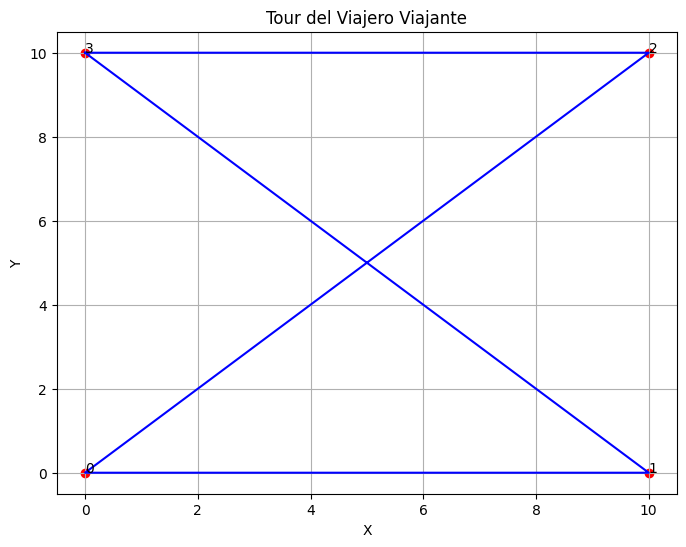

In [ ]:
!pip install deap
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Distancias entre ciudades (matriz de ejemplo)
distances = np.array([
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
])

# Coordenadas de las ciudades para graficar
city_coords = np.array([
    [0, 0],
    [10, 0],
    [10, 10],
    [0, 10]
])

# Crear clases de aptitud y individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función para evaluar la distancia total de un tour
def evalTSP(individual):
    distance = 0
    for i in range(len(individual) - 1):
        distance += distances[individual[i]][individual[i + 1]]
    distance += distances[individual[-1]][individual[0]]  # regreso a la ciudad de origen
    return distance,

# Función para crear un individuo
def create_individual():
    ind = list(range(len(distances)))
    random.shuffle(ind)
    return ind

# Registro de las funciones en DEAP
toolbox = base.Toolbox()
toolbox.register("indices", create_individual)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

# Función para graficar el tour
def plot_tour(individual, coords):
    plt.figure(figsize=(8, 6))
    plt.scatter(coords[:, 0], coords[:, 1], c='red')

    tour_coords = coords[individual + [individual[0]]]
    plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'b-')

    for i, txt in enumerate(individual):
        plt.annotate(txt, (coords[txt, 0], coords[txt, 1]))

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Tour del Viajero Viajante')
    plt.grid(True)
    plt.show()

# Función principal
def main():
    random.seed(42)

    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=500,
                        stats=stats, halloffame=hof, verbose=True)

    return pop, stats, hof

if __name__ == "__main__":
    population, statistics, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Mejor individuo:", best_individual)
    print("Distancia del mejor tour:", evalTSP(best_individual)[0])

    # Graficar el mejor tour
    plot_tour(best_individual, city_coords)


/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min    	avg    
0  	300   	656.712	932.854
1  	243   	643.997	871.885
2  	215   	623.746	829.979
3  	239   	527.115	787.132
4  	222   	527.115	759.71 
5  	228   	540.979	738.894
6  	222   	540.979	720.109
7  	232   	462.571	696.442
8  	221   	462.571	666.301
9  	226   	462.571	642.953
10 	232   	462.571	624.243
11 	234   	462.571	611.88 
12 	230   	456.251	595.47 
13 	235   	436.893	587.876
14 	240   	436.893	582.633
15 	242   	436.893	577.971
16 	234   	420.23 	570.606
17 	244   	430.655	565.881
18 	229   	430.655	556.29 
19 	224   	427.112	541.85 
20 	221   	432.058	549.287
21 	240   	422.218	545.309
22 	243   	420.91 	543.958
23 	219   	420.91 	536.961
24 	239   	413.632	530.28 
25 	253   	403.673	528.944
26 	234   	400.482	517.386
27 	231   	413.632	510.663
28 	229   	403.642	511.32 
29 	224   	404.844	505.44 
30 	222   	402.627	505.559
31 	243   	388.637	495.101
32 	228   	388.637	497.228
33 	243   	389.699	491.687
34 	239   	388.637	488.489
35 	224   	361.909	478.845
3

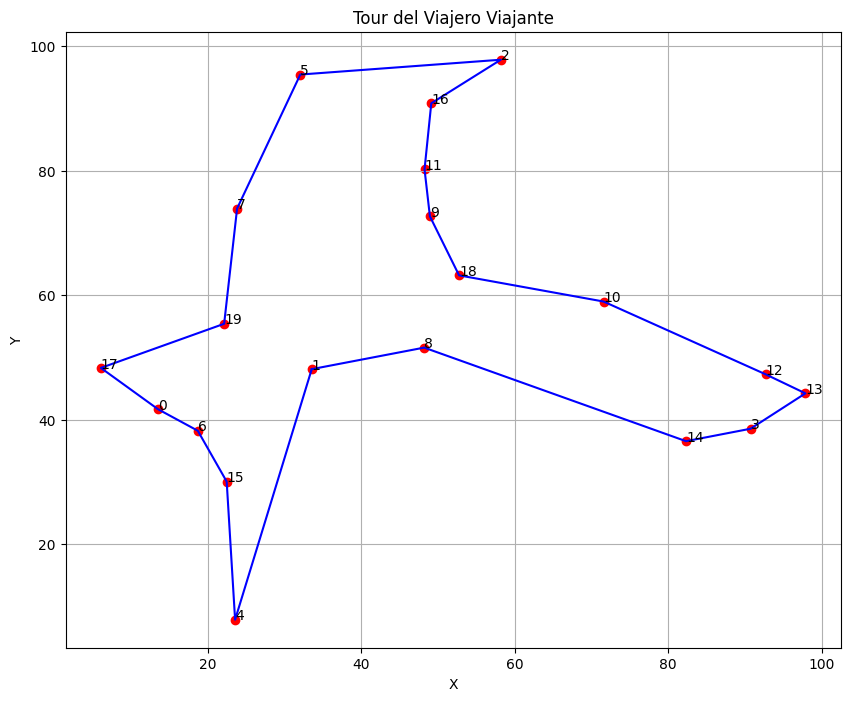

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Generar coordenadas aleatorias para 20 ciudades
num_cities = 20
city_coords = np.random.rand(num_cities, 2) * 100

# Calcular la matriz de distancias
distances = np.zeros((num_cities, num_cities))
for i in range(num_cities):
    for j in range(num_cities):
        if i != j:
            distances[i][j] = np.linalg.norm(city_coords[i] - city_coords[j])

# Crear clases de aptitud e individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función para evaluar la distancia total de un tour
def evalTSP(individual):
    distance = 0
    for i in range(len(individual) - 1):
        distance += distances[individual[i]][individual[i + 1]]
    distance += distances[individual[-1]][individual[0]]  # regreso a la ciudad de origen
    return distance,

# Función para crear un individuo
def create_individual():
    ind = list(range(num_cities))
    random.shuffle(ind)
    return ind

# Registro de las funciones en DEAP
toolbox = base.Toolbox()
toolbox.register("indices", create_individual)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalTSP)

# Función para graficar el tour
def plot_tour(individual, coords):
    plt.figure(figsize=(10, 8))
    plt.scatter(coords[:, 0], coords[:, 1], c='red')

    tour_coords = coords[individual + [individual[0]]]
    plt.plot(tour_coords[:, 0], tour_coords[:, 1], 'b-')

    for i, txt in enumerate(individual):
        plt.annotate(txt, (coords[txt, 0], coords[txt, 1]))

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Tour del Viajero Viajante')
    plt.grid(True)
    plt.show()

# Función principal
def main():
    random.seed(42)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=1000,
                        stats=stats, halloffame=hof, verbose=True)

    return pop, stats, hof

if __name__ == "__main__":
    population, statistics, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Mejor individuo:", best_individual)
    print("Distancia del mejor tour:", evalTSP(best_individual)[0])

    # Graficar el mejor tour
    plot_tour(best_individual, city_coords)


gen	nevals	min    	avg    
0  	300   	933.206	1200.79
1  	228   	937.973	1141.06
2  	242   	861.466	1103.51
3  	241   	814.372	1077.48
4  	239   	674.881	1037.07
5  	222   	674.881	997.054
6  	215   	674.881	949.073
7  	232   	595.653	915.551
8  	224   	595.653	865.523
9  	215   	595.653	815.563
10 	219   	572.494	763.476
11 	229   	519.177	698.979
12 	228   	517.228	658.019
13 	224   	484.47 	628.002
14 	232   	467.225	598.253
15 	247   	434.638	567.317
16 	226   	418.844	537.597
17 	232   	376.435	506.479
18 	220   	333.05 	473.473
19 	226   	299.824	438.61 
20 	224   	314.763	407.716
21 	243   	230.837	370.241
22 	249   	230.77 	341.9  
23 	216   	230.77 	314.395
24 	235   	193.523	286.638
25 	255   	161.191	265.142
26 	232   	161.191	244.135
27 	231   	161.191	225.019
28 	229   	140.992	204.413
29 	224   	108.66 	185.534
30 	222   	108.66 	165.814
31 	243   	107.366	153.116
32 	228   	107.366	143.719
33 	243   	103.551	133.641
34 	239   	98.1454	121.473
35 	224   	98.1454	112.208
3

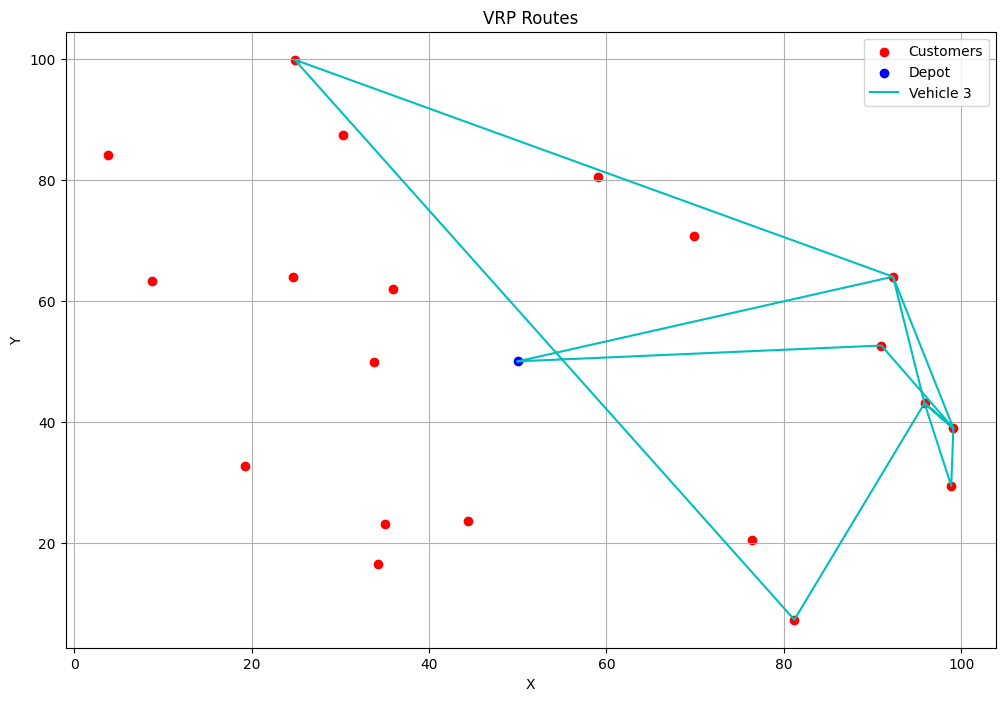

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Definición del problema VRP
num_vehicles = 5
vehicle_capacity = 50
num_customers = 20
depot = np.array([50, 50])

# Generar coordenadas aleatorias para clientes
customer_coords = np.random.rand(num_customers, 2) * 100
customer_demands = np.random.randint(1, 10, size=num_customers)

# Calcular la matriz de distancias
distances = np.zeros((num_customers + 1, num_customers + 1))
all_coords = np.vstack((depot, customer_coords))
for i in range(num_customers + 1):
    for j in range(num_customers + 1):
        if i != j:
            distances[i][j] = np.linalg.norm(all_coords[i] - all_coords[j])

# Crear clases de aptitud e individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función para evaluar la distancia total de las rutas
def evalVRP(individual):
    total_distance = 0
    vehicle_loads = [0] * num_vehicles
    routes = [[] for _ in range(num_vehicles)]
    for gene in individual:
        vehicle, customer = gene
        if vehicle_loads[vehicle] + customer_demands[customer] <= vehicle_capacity:
            vehicle_loads[vehicle] += customer_demands[customer]
            routes[vehicle].append(customer)
    for route in routes:
        if route:
            total_distance += distances[0][route[0] + 1]
            for i in range(len(route) - 1):
                total_distance += distances[route[i] + 1][route[i + 1] + 1]
            total_distance += distances[route[-1] + 1][0]
    return total_distance,

# Función para crear un individuo
def create_individual():
    individual = [(random.randint(0, num_vehicles - 1), i) for i in range(num_customers)]
    return individual

# Registro de las funciones en DEAP
toolbox = base.Toolbox()
toolbox.register("indices", create_individual)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalVRP)

# Función para graficar las rutas
def plot_routes(individual, depot, customer_coords):
    plt.figure(figsize=(12, 8))
    plt.scatter(customer_coords[:, 0], customer_coords[:, 1], c='red', label='Customers')
    plt.scatter(depot[0], depot[1], c='blue', label='Depot')

    colors = ['b', 'g', 'c', 'm', 'y']
    routes = [[] for _ in range(num_vehicles)]
    for gene in individual:
        vehicle, customer = gene
        routes[vehicle].append(customer)

    for i, route in enumerate(routes):
        if route:
            route_coords = np.vstack((depot, customer_coords[route], depot))
            plt.plot(route_coords[:, 0], route_coords[:, 1], colors[i % len(colors)], label=f'Vehicle {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('VRP Routes')
    plt.legend()
    plt.grid(True)
    plt.show()

# Función principal
def main():
    random.seed(42)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=1000,
                        stats=stats, halloffame=hof, verbose=True)

    return pop, stats, hof

if __name__ == "__main__":
    population, statistics, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Mejor individuo:", best_individual)
    print("Distancia total de las rutas:", evalVRP(best_individual)[0])

    # Graficar las mejores rutas
    plot_routes(best_individual, depot, customer_coords)


In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# Parámetros del problema
n = 8  # Número de reinas y tamaño del tablero

# Crear clases de aptitud e individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función para evaluar el número de conflictos en el tablero
def evalNQueens(individual):
    horizontal_collisions = sum([individual.count(queen)-1 for queen in individual])/2
    diagonal_collisions = 0

    n = len(individual)
    left_diagonal = [0] * (2*n-1)
    right_diagonal = [0] * (2*n-1)
    for i in range(n):
        left_diagonal[i + individual[i]] += 1
        right_diagonal[n - 1 - i + individual[i]] += 1

    diagonal_collisions += sum([max(0, count-1) for count in left_diagonal])/2
    diagonal_collisions += sum([max(0, count-1) for count in right_diagonal])/2

    return horizontal_collisions + diagonal_collisions,

# Función para crear un individuo
def create_individual():
    return random.sample(range(n), n)

# Registro de las funciones en DEAP
toolbox = base.Toolbox()
toolbox.register("indices", create_individual)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalNQueens)

# Función para imprimir el tablero
def print_board(individual):
    board = np.zeros((n, n), dtype=int)
    for row, col in enumerate(individual):
        board[row][col] = 1
    print(board)

# Función principal
def main():
    random.seed(42)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=1000,
                        stats=stats, halloffame=hof, verbose=True)

    return pop, stats, hof

if __name__ == "__main__":
    population, statistics, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Mejor individuo:", best_individual)
    print("Número de conflictos:", evalNQueens(best_individual)[0])

    # Imprimir el tablero del mejor individuo
    print_board(best_individual)


gen	nevals	min	avg    
0  	300   	0.5	2.04167
1  	236   	0.5	2.95   
2  	231   	0.5	3.21   
3  	220   	1  	3.14   
4  	223   	0.5	3.08833
5  	225   	0.5	3.07   
6  	218   	0.5	3.02   
7  	235   	0.5	3.02833
8  	243   	1  	3.19333
9  	232   	1  	2.99   
10 	235   	0.5	2.89833
11 	214   	0.5	2.53   
12 	249   	0.5	2.50667
13 	229   	0.5	2.31   
14 	241   	0  	2.06167
15 	241   	0  	1.74667
16 	249   	0  	1.47667
17 	231   	0  	1.44833
18 	230   	0.5	1.28167
19 	224   	0.5	1.4    
20 	223   	0  	1.25167
21 	220   	0  	1.29167
22 	220   	0  	1.22167
23 	237   	0  	1.25   
24 	224   	0  	1.04167
25 	241   	0  	0.918333
26 	225   	0  	0.705   
27 	236   	0  	0.645   
28 	225   	0.5	0.663333
29 	233   	0.5	0.721667
30 	225   	0.5	0.643333
31 	211   	0.5	0.635   
32 	237   	0.5	0.655   
33 	211   	0.5	0.64    
34 	249   	0.5	0.665   
35 	228   	0.5	0.678333
36 	248   	0.5	0.681667
37 	224   	0.5	0.645   
38 	210   	0.5	0.66    
39 	207   	0.5	0.66    
40 	214   	0.5	0.71    
41 	228   	0.5	0.6

gen	nevals	min	avg    
0  	300   	0.5	2.04167
1  	236   	0.5	2.95   
2  	231   	0.5	3.21   
3  	220   	1  	3.14   
4  	223   	0.5	3.08833
5  	225   	0.5	3.07   
6  	218   	0.5	3.02   
7  	235   	0.5	3.02833
8  	243   	1  	3.19333
9  	232   	1  	2.99   
10 	235   	0.5	2.89833
11 	214   	0.5	2.53   
12 	249   	0.5	2.50667
13 	229   	0.5	2.31   
14 	241   	0  	2.06167
15 	241   	0  	1.74667
16 	249   	0  	1.47667
17 	231   	0  	1.44833
18 	230   	0.5	1.28167
19 	224   	0.5	1.4    
20 	223   	0  	1.25167
21 	220   	0  	1.29167
22 	220   	0  	1.22167
23 	237   	0  	1.25   
24 	224   	0  	1.04167
25 	241   	0  	0.918333
26 	225   	0  	0.705   
27 	236   	0  	0.645   
28 	225   	0.5	0.663333
29 	233   	0.5	0.721667
30 	225   	0.5	0.643333
31 	211   	0.5	0.635   
32 	237   	0.5	0.655   
33 	211   	0.5	0.64    
34 	249   	0.5	0.665   
35 	228   	0.5	0.678333
36 	248   	0.5	0.681667
37 	224   	0.5	0.645   
38 	210   	0.5	0.66    
39 	207   	0.5	0.66    
40 	214   	0.5	0.71    
41 	228   	0.5	0.6

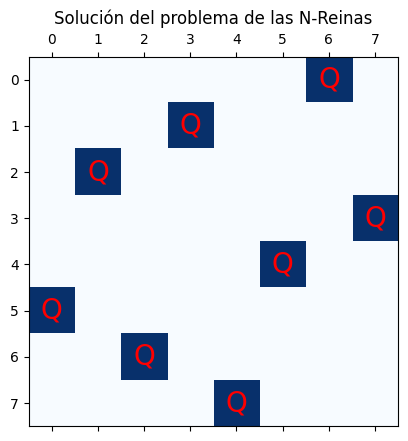

In [ ]:
import random
import numpy as np
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt

# Parámetros del problema
n = 8  # Número de reinas y tamaño del tablero

# Crear clases de aptitud e individuo
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Función para evaluar el número de conflictos en el tablero
def evalNQueens(individual):
    horizontal_collisions = sum([individual.count(queen)-1 for queen in individual])/2
    diagonal_collisions = 0

    n = len(individual)
    left_diagonal = [0] * (2*n-1)
    right_diagonal = [0] * (2*n-1)
    for i in range(n):
        left_diagonal[i + individual[i]] += 1
        right_diagonal[n - 1 - i + individual[i]] += 1

    diagonal_collisions += sum([max(0, count-1) for count in left_diagonal])/2
    diagonal_collisions += sum([max(0, count-1) for count in right_diagonal])/2

    return horizontal_collisions + diagonal_collisions,

# Función para crear un individuo
def create_individual():
    return random.sample(range(n), n)

# Registro de las funciones en DEAP
toolbox = base.Toolbox()
toolbox.register("indices", create_individual)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Operadores genéticos
toolbox.register("mate", tools.cxUniform, indpb=0.5)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalNQueens)

# Función para imprimir el tablero
def print_board(individual):
    board = np.zeros((n, n), dtype=int)
    for row, col in enumerate(individual):
        board[row][col] = 1
    print(board)

# Función para graficar el tablero
def plot_board(individual):
    board = np.zeros((n, n), dtype=int)
    for row, col in enumerate(individual):
        board[row][col] = 1

    fig, ax = plt.subplots()
    ax.matshow(board, cmap=plt.cm.Blues)

    for i in range(n):
        for j in range(n):
            if board[i, j] == 1:
                ax.text(j, i, 'Q', ha='center', va='center', color='red', fontsize=20)

    plt.title('Solución del problema de las N-Reinas')
    plt.show()

# Función principal
def main():
    random.seed(42)

    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=1000,
                        stats=stats, halloffame=hof, verbose=True)

    return pop, stats, hof

if __name__ == "__main__":
    population, statistics, hall_of_fame = main()
    best_individual = hall_of_fame[0]
    print("Mejor individuo:", best_individual)
    print("Número de conflictos:", evalNQueens(best_individual)[0])

    # Imprimir y graficar el tablero del mejor individuo
    print_board(best_individual)
    plot_board(best_individual)
